In [161]:
from collections import defaultdict

In [162]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [163]:
%autoreload 2

In [164]:
import torch
import numpy as np

In [165]:
import sys
sys.path.append("/home/nima/Git/discrete_rep_classification/pytorch/")

In [334]:
from models import SimpMLP
from datautils import TrainLoader, TestLoader, TestSet
from train import Train
from utils import find_advs_img, find_image_for_representation

In [304]:
model = SimpMLP(noise_var=0.5)

In [305]:
Train(
model,
TrainLoader,
TestLoader,
learning_rate=1e-03
)

epoch : 0, acc: 88.76000213623047, loss: 884.9050894975662
epoch : 1, acc: 89.41999816894531, loss: 459.51021027565
epoch : 2, acc: 91.19000244140625, loss: 304.7524152994156
epoch : 3, acc: 90.8499984741211, loss: 250.61053363978863
epoch : 4, acc: 91.98999786376953, loss: 218.8447264879942
epoch : 5, acc: 93.05999755859375, loss: 209.19037203490734
epoch : 6, acc: 92.19999694824219, loss: 192.1270250827074
epoch : 7, acc: 93.62000274658203, loss: 191.37461107224226
epoch : 8, acc: 93.19000244140625, loss: 176.7750779092312
epoch : 9, acc: 90.79000091552734, loss: 174.78866909444332


In [306]:
test_ = defaultdict(lambda : [])

In [307]:
import matplotlib.pyplot as plt

In [308]:
i, l = TestSet[22]

In [309]:
for i, l in TestSet:
    test_[l].append(torch.from_numpy(i))

In [310]:
test_.keys()

dict_keys([7, 2, 1, 0, 4, 9, 5, 6, 3, 8])

In [312]:
reps = defaultdict(lambda  : defaultdict(lambda : [0, 0]))
with torch.no_grad():
    for i in range(10):
        for img in test_[i]:
            rep = model.representation_rounded(img)[0].tolist()
            status = int(model(img.reshape(1,- 1)).argmax() == i)
            reps[i][ tuple( map(int, rep))][0] += 1
            reps[i][ tuple( map(int, rep))][1] += status

In [313]:
keys_ = []
for i in range(10):
    keys_.extend( list(reps[i].keys()))

In [356]:
target_rep = torch.zeros(10)
target_rep[0] = 1
target_rep

tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [394]:
img_ = torch.nn.Parameter(test_[0][0].clone(), requires_grad=True)

In [395]:
model.test()
rep_ = model.representation(img_)

In [396]:
loss = torch.nn.MSELoss()

In [397]:
rep_, target_rep

(tensor([1., 0., 1., 0., 1., 0., 1., 1., 0., 0.], grad_fn=<SigmoidBackward0>),
 tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [398]:
loss_ = loss(rep_, target_rep)

In [399]:
loss_

tensor(0.4000, grad_fn=<MseLossBackward0>)

In [400]:
loss_.backward()

In [401]:
img_.grad

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [402]:
img_ = find_image_for_representation(model, test_[0][0].clone(), target_rep, loss_func=torch.nn.MSELoss(), lr=1e-3)

iter: 0, loss: 0.4, rep_: tensor([1., 0., 1., 0., 1., 0., 1., 1., 0., 0.], grad_fn=<SigmoidBackward0>)
iter: 1, loss: 0.4, rep_: tensor([1., 0., 1., 0., 1., 0., 1., 1., 0., 0.], grad_fn=<SigmoidBackward0>)
iter: 2, loss: 0.4, rep_: tensor([1., 0., 1., 0., 1., 0., 1., 1., 0., 0.], grad_fn=<SigmoidBackward0>)
iter: 3, loss: 0.4, rep_: tensor([1., 0., 1., 0., 1., 0., 1., 1., 0., 0.], grad_fn=<SigmoidBackward0>)
iter: 4, loss: 0.4, rep_: tensor([1., 0., 1., 0., 1., 0., 1., 1., 0., 0.], grad_fn=<SigmoidBackward0>)
iter: 5, loss: 0.4, rep_: tensor([1., 0., 1., 0., 1., 0., 1., 1., 0., 0.], grad_fn=<SigmoidBackward0>)
iter: 6, loss: 0.4, rep_: tensor([1., 0., 1., 0., 1., 0., 1., 1., 0., 0.], grad_fn=<SigmoidBackward0>)
iter: 7, loss: 0.4, rep_: tensor([1., 0., 1., 0., 1., 0., 1., 1., 0., 0.], grad_fn=<SigmoidBackward0>)
iter: 8, loss: 0.4, rep_: tensor([1., 0., 1., 0., 1., 0., 1., 1., 0., 0.], grad_fn=<SigmoidBackward0>)
iter: 9, loss: 0.4, rep_: tensor([1., 0., 1., 0., 1., 0., 1., 1., 0., 0.]

In [266]:
target_class = torch.zeros(10)
target_class[1] = 1
target_class

tensor([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [336]:
img_ = find_advs_img(model, test_[0][0].clone(), target_class, num_iter=1000, lr=1e-2)

iter: 0, loss: 7.9961, target_class: 0
iter: 1, loss: 6.4876, target_class: 0
iter: 2, loss: 6.8411, target_class: 0
iter: 3, loss: 6.209, target_class: 0
iter: 4, loss: 5.0042, target_class: 0
iter: 5, loss: 7.1896, target_class: 0
iter: 6, loss: 6.4043, target_class: 0
iter: 7, loss: 6.7015, target_class: 0
iter: 8, loss: 6.4424, target_class: 0
iter: 9, loss: 5.5452, target_class: 0
iter: 10, loss: 7.2358, target_class: 0
iter: 11, loss: 8.2124, target_class: 0
iter: 12, loss: 5.9268, target_class: 0
iter: 13, loss: 6.9798, target_class: 0
iter: 14, loss: 7.5903, target_class: 0
iter: 15, loss: 5.4976, target_class: 0
iter: 16, loss: 6.733, target_class: 0
iter: 17, loss: 5.8861, target_class: 0
iter: 18, loss: 5.0939, target_class: 0
iter: 19, loss: 7.0585, target_class: 0
iter: 20, loss: 7.3656, target_class: 0
iter: 21, loss: 5.7536, target_class: 0
iter: 22, loss: 5.6618, target_class: 0
iter: 23, loss: 8.5273, target_class: 0
iter: 24, loss: 5.2685, target_class: 0
iter: 25, lo

iter: 204, loss: 5.9108, target_class: 0
iter: 205, loss: 7.2674, target_class: 0
iter: 206, loss: 6.7043, target_class: 0
iter: 207, loss: 7.4184, target_class: 0
iter: 208, loss: 6.1155, target_class: 0
iter: 209, loss: 6.7192, target_class: 0
iter: 210, loss: 5.8768, target_class: 0
iter: 211, loss: 6.9074, target_class: 0
iter: 212, loss: 8.0449, target_class: 0
iter: 213, loss: 5.6451, target_class: 0
iter: 214, loss: 6.9109, target_class: 0
iter: 215, loss: 7.7402, target_class: 0
iter: 216, loss: 5.7839, target_class: 0
iter: 217, loss: 7.8446, target_class: 0
iter: 218, loss: 6.4471, target_class: 0
iter: 219, loss: 5.9157, target_class: 0
iter: 220, loss: 6.0491, target_class: 0
iter: 221, loss: 3.8961, target_class: 0
iter: 222, loss: 5.88, target_class: 0
iter: 223, loss: 7.7634, target_class: 0
iter: 224, loss: 5.003, target_class: 0
iter: 225, loss: 6.0286, target_class: 0
iter: 226, loss: 7.9775, target_class: 0
iter: 227, loss: 7.4718, target_class: 0
iter: 228, loss: 7.

iter: 424, loss: 5.9669, target_class: 0
iter: 425, loss: 6.4616, target_class: 0
iter: 426, loss: 5.4932, target_class: 0
iter: 427, loss: 4.2663, target_class: 0
iter: 428, loss: 7.5778, target_class: 0
iter: 429, loss: 7.0037, target_class: 0
iter: 430, loss: 6.9727, target_class: 0
iter: 431, loss: 7.0394, target_class: 0
iter: 432, loss: 6.4759, target_class: 0
iter: 433, loss: 6.8875, target_class: 0
iter: 434, loss: 6.9084, target_class: 0
iter: 435, loss: 6.4445, target_class: 0
iter: 436, loss: 6.0961, target_class: 0
iter: 437, loss: 6.5549, target_class: 0
iter: 438, loss: 6.0469, target_class: 0
iter: 439, loss: 6.6085, target_class: 0
iter: 440, loss: 7.178, target_class: 0
iter: 441, loss: 7.6391, target_class: 0
iter: 442, loss: 5.4392, target_class: 0
iter: 443, loss: 6.4229, target_class: 0
iter: 444, loss: 7.5907, target_class: 0
iter: 445, loss: 5.8743, target_class: 0
iter: 446, loss: 6.4479, target_class: 0
iter: 447, loss: 7.2878, target_class: 0
iter: 448, loss: 

iter: 653, loss: 6.7967, target_class: 0
iter: 654, loss: 7.1404, target_class: 0
iter: 655, loss: 8.3517, target_class: 0
iter: 656, loss: 8.6484, target_class: 0
iter: 657, loss: 6.5836, target_class: 0
iter: 658, loss: 7.2763, target_class: 0
iter: 659, loss: 6.5259, target_class: 0
iter: 660, loss: 7.6723, target_class: 0
iter: 661, loss: 7.4185, target_class: 0
iter: 662, loss: 7.8305, target_class: 0
iter: 663, loss: 7.6005, target_class: 0
iter: 664, loss: 6.414, target_class: 0
iter: 665, loss: 6.9195, target_class: 0
iter: 666, loss: 6.6849, target_class: 0
iter: 667, loss: 5.7975, target_class: 0
iter: 668, loss: 5.9072, target_class: 0
iter: 669, loss: 7.7044, target_class: 0
iter: 670, loss: 5.0943, target_class: 0
iter: 671, loss: 7.2493, target_class: 0
iter: 672, loss: 5.868, target_class: 0
iter: 673, loss: 5.1057, target_class: 0
iter: 674, loss: 7.9728, target_class: 0
iter: 675, loss: 7.9548, target_class: 0
iter: 676, loss: 7.1433, target_class: 0
iter: 677, loss: 6

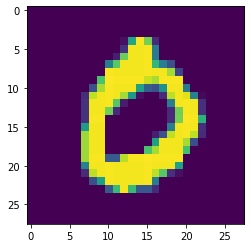

In [198]:
plt.imshow(test_[0][0].reshape(28, 28))

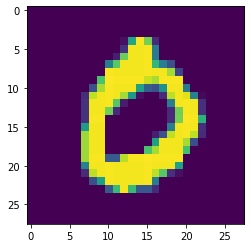

In [213]:
plt.imshow(torch.nn.utils.parameters_to_vector(img_).reshape(28, 28).detach().numpy())

In [189]:
p = torch.nn.Parameter(test_[0][0].clone(), requires_grad=True)

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    eps: 1e-08
    foreach: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)